In [180]:
# Agenda
# Predict the possibility of diabetes based on multiple diagnostic measurements 
# Dataset has been sourced from NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases)

# Credentials - kasham1991@gmail.com | Karan Sharma

In [181]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [182]:
# Goal 1.0: Descriptive analysis
# 1. Understand the different variables and values
# 2. Identify missing values to suggest treatment
# 3. Counting the various dtypes 

In [183]:
# Loading the dataset
Diabetes = pd.read_csv('C:\\Datasets\\Diabetes.csv')

In [184]:
# Lets look at the top five values
# 8 feature variables and 1 predicted value
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [185]:
# Lets see the data frame in detail
# There are two dtypes
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [186]:
# Now that we know the dtypes, lets get into statistics
# The describe function deals only with numerical values
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [187]:
# Lets use the transpose function to get a better view
# Moving the rows data to the column and columns data to the rows
# There are multiple 0 values; missing values
# Glucose, blood pressure, skin thickness, insulin and BMI have missing values
# Pregancy can be ignored as 0 indicates no children
Diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [188]:
# Replacing 0s with NaN, it will be easier to count them 
# Plus, 0s have to be replaced with a suitable value anyway, let it be NaN for now
Diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [189]:
# Checking total NaN values
Diabetes.isnull()
Diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [190]:
# Visualizing the null values
# ggplot2 is a data visualization package from the statistical programming language R
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
plt.style.use('ggplot')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000261688CE460>,
      dtype=object)

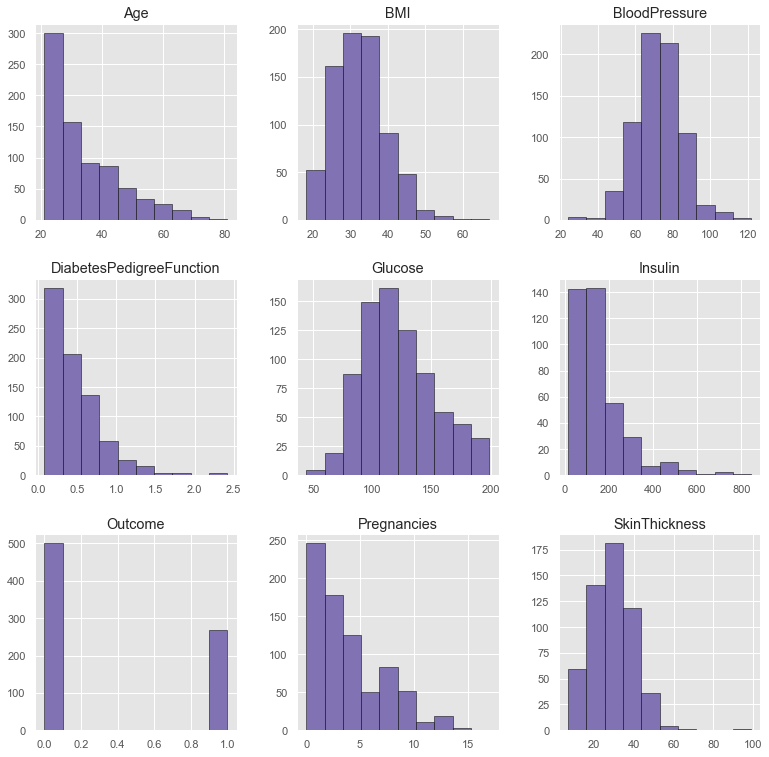

In [191]:
# Understanding the distribution of null values with individual histograms
# You can choose the figure size as per your screen
Diabetes.hist(figsize = (13, 13), color = 'm', edgecolor = 'black')

In [192]:
# Treating the missing values accordingly with mean and median
# Mean is suitable for data that is centrally placed
# Median is suitable for data that has outliers and is subject to skewness
Diabetes['Glucose'].fillna(Diabetes['Glucose'].mean(), inplace = True)
Diabetes['BloodPressure'].fillna(Diabetes['BloodPressure'].mean(), inplace = True)
Diabetes['SkinThickness'].fillna(Diabetes['SkinThickness'].median(), inplace = True)
Diabetes['Insulin'].fillna(Diabetes['Insulin'].median(), inplace = True)
Diabetes['BMI'].fillna(Diabetes['BMI'].median(), inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000261692FEA60>,
      dtype=object)

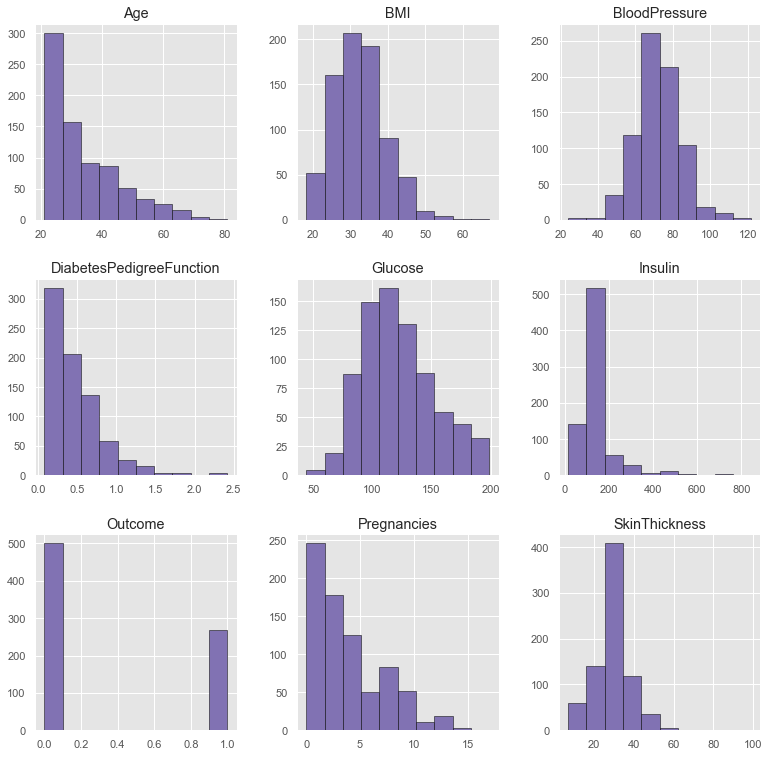

In [193]:
# Plotting after NaN value treatment
# We can clearly see the change in the histograms
Diabetes.hist(figsize = (13, 13), color = 'm', edgecolor = 'black')

In [194]:
# Goal 2.0: Data exploration
# 1. Checking the balance of the data
# 2. Creating scatter charts between variables
# 3. Correlation analysis

In [195]:
# Seaborn has a count plot method that shows the counts of observations 
import seaborn as sns
sns.set()

In [196]:
# Looking at the shape of the data
# 768 rows and 9 colums; dimensions
# Out of the 768 persons, 500 are labeled as 0 (non-diabetic) and 268 as 1 (diabetic)
Diabetes.shape
Diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Text(0.5, 1.0, 'Count Plot for Outcome')

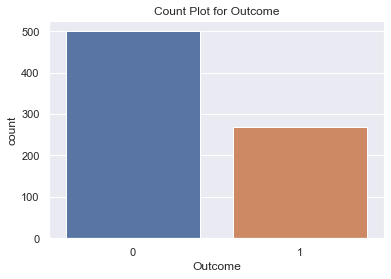

In [197]:
# Creating count plot with title using seaborn
# Number of non-diabetics is twice the number of diabetic patients
sns.countplot(x = Diabetes.Outcome)
plt.title("Count Plot for Outcome")

Text(0.5, 1.0, 'Pairplot of Variables by Outcome')

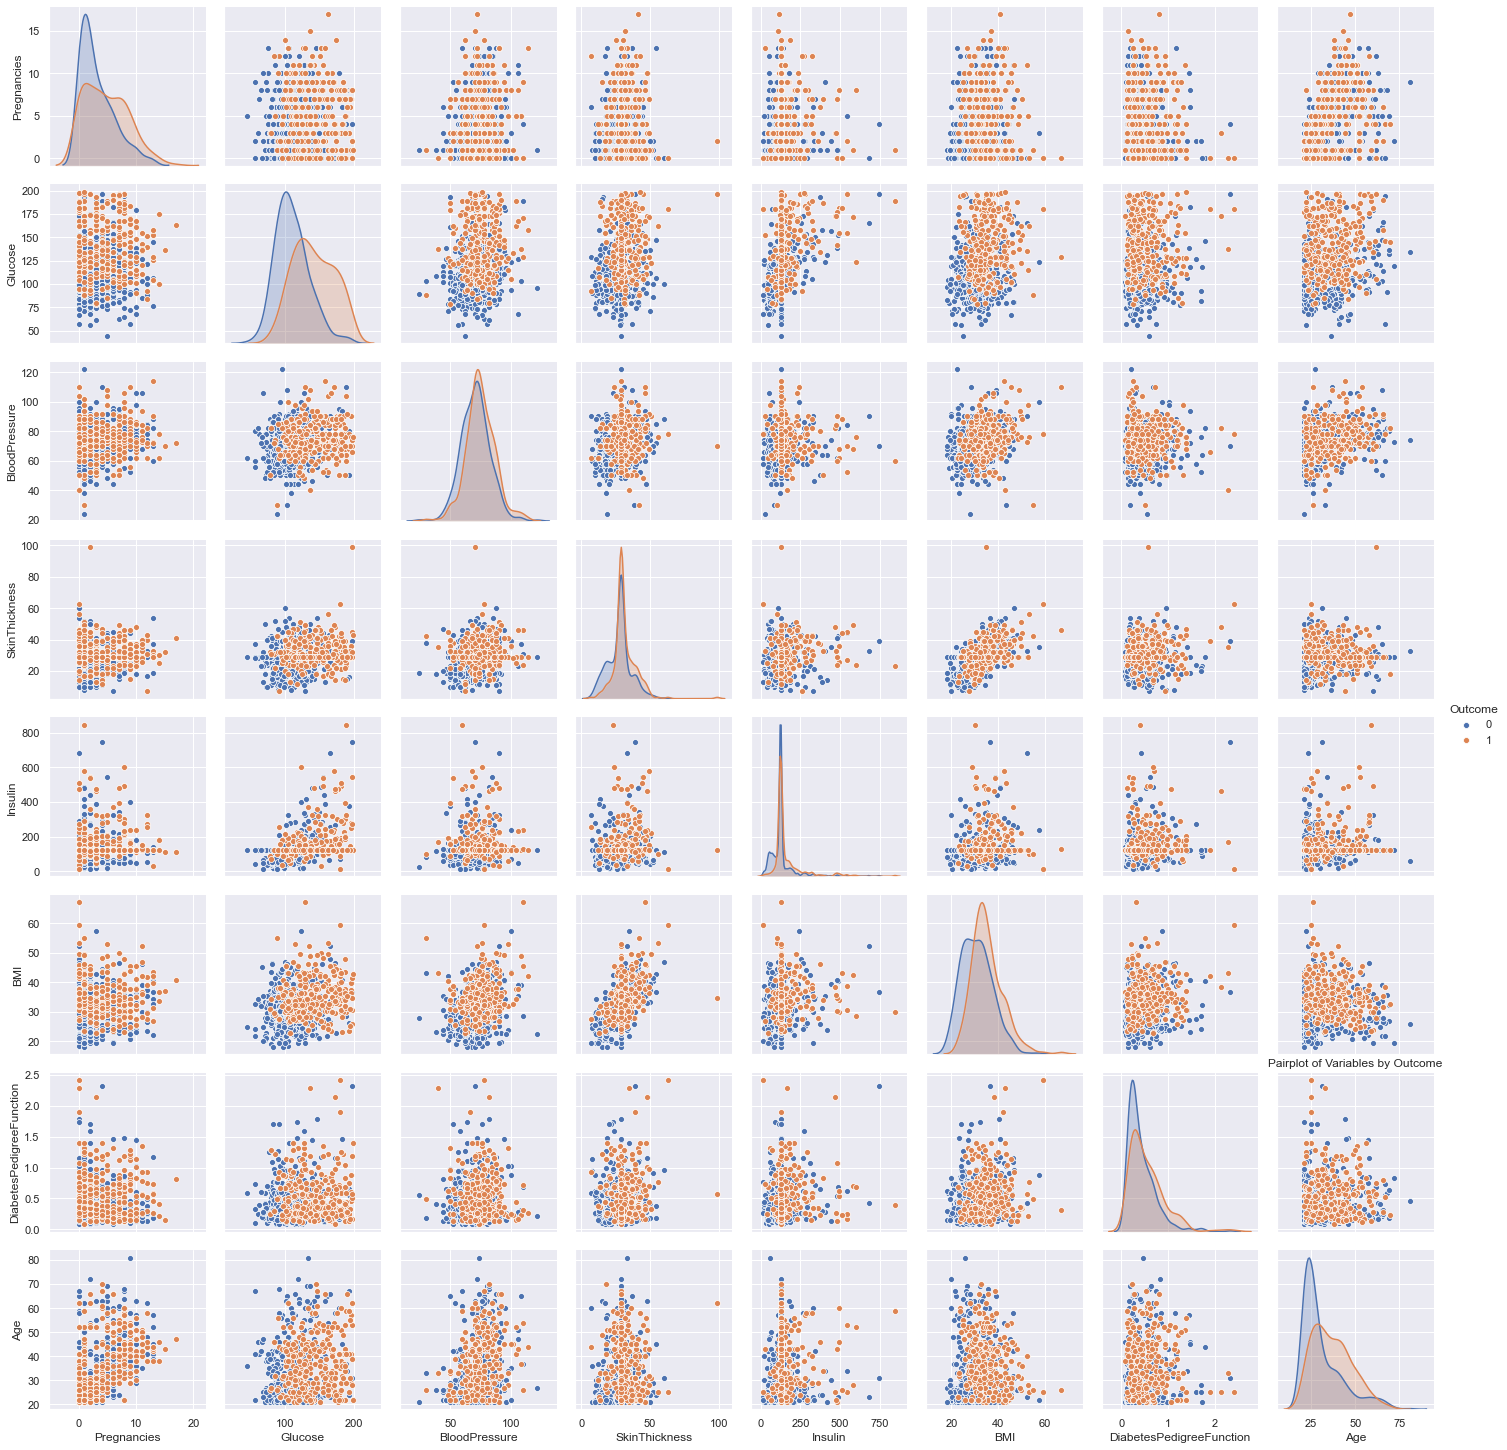

In [198]:
# Creating a pairplot on the basis of outcome
# Pairplot comprises of a histogram and a scatter plot
# It will showcase the distribution of a single variable/relationship b/w two variables
# this will show how much one variable is affected by another
sns.pairplot(Diabetes, hue = 'Outcome')
plt.title("Pairplot of Variables by Outcome")

In [199]:
# Creating a correlation matrix
a = Diabetes.corr(method = 'pearson')
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<Figure size 1440x1440 with 0 Axes>

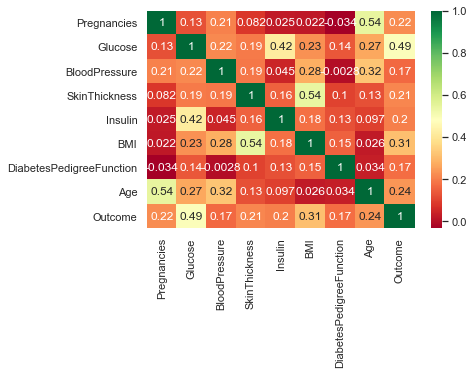

<Figure size 1440x1440 with 0 Axes>

In [200]:
# Creating a heatmap for the same
# Age & pregnancies, BMI & skin thickness, insulin & glucose have moderate positive linear relationship
sns.heatmap(a, annot= True , cmap ='RdYlGn')
plt.figure(figsize=(20, 20))

In [201]:
# Goal 3.0: ML modeling
# 1. Standardization and Model Building
# 2. Model Building using KNeighboursClassifier with cross validation

In [202]:
# Since we are using KNN, it is better to standardize the data
# Standardization involves shifting the distribution of each data point to a mean of 0 and an SD of 1
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x =  pd.DataFrame(sc_x.fit_transform(Diabetes.drop(["Outcome"], axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [203]:
# Creating the predictor variable
y = Diabetes.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [204]:
# Splitting the data into train/test with stratify
# Our data is highly imbalanced, stratify = y will handle the samples accordingly
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 1, stratify = y)

In [205]:
# Fitting the KNeighborsClassifier algorithm with K Flold Cross Validation
# A CV of 5 or 10 is generally preferred 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 10)
knn_model = knn.fit(x_train, y_train)
Accuracy_Scores_10_fold = cross_val_score(knn_model, x, y, cv = 10, scoring = 'accuracy')
print('Accuracy score over 10 validation datasets are: ', Accuracy_Scores_10_fold)
print('Average Accuracy score over 10 validation datasets is: ', round(Accuracy_Scores_10_fold.mean(), 2))

Accuracy score over 10 validation datasets are:  [0.72727273 0.76623377 0.77922078 0.7012987  0.74025974 0.68831169
 0.81818182 0.76623377 0.68421053 0.81578947]
Average Accuracy score over 10 validation datasets is:  0.75


In [206]:
# Goal 4.0: Classification report 
# Confusion Matrix
# AUC-ROC Curve

In [207]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Outcome,,,
0,151,16,167
1,49,40,89
All,200,56,256


In [208]:
# Classification report
# 0.74 precision is considered good
# recall > 0.5 is considered good
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       167
           1       0.71      0.45      0.55        89

    accuracy                           0.75       256
   macro avg       0.73      0.68      0.69       256
weighted avg       0.74      0.75      0.73       256



Text(0.5, 1.0, 'KNN (n_neighbors = 10) ROC Curve')

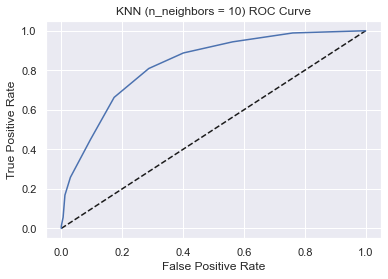

In [209]:
# Creating and Plotting ROC-AUC
# Receiver Operating Characteristic Curve
from sklearn.metrics import roc_curve
y_pred_roc = knn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN (n_neighbors = 10) ROC Curve')

In [210]:
# AUC - Area under the curve
# This is in the form of a score
# Higher the AUC, better the model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_roc)

0.8287357868532597

In [211]:
# ML Modeling with Logistic Regression
from sklearn.linear_model import LogisticRegression
s = LogisticRegression()
s.fit(x_train, y_train)

LogisticRegression()

In [212]:
print(s.score(x_train, y_train))
print(s.score(x_test, y_test))

0.7734375
0.765625


In [213]:
# Using ANN Modeling
import tensorflow as tf

In [214]:
tf.__version__

'2.3.0'

In [215]:
# Architecting ANN

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 10, activation = 'relu', input_dim = 8),
    tf.keras.layers.Dense(units = 8, activation = 'relu' ),
    tf.keras.layers.Dense(units = 6, activation = 'relu' ),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
    
])

In [216]:
# Compile ANN

model3.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
             )

In [219]:
# Fitting the model

model3.fit(x_train,
         y_train,
         epochs = 10,
         validation_data= (x_test, y_test))

Epoch 1/10
16/16 [==============================] - 0s 6ms/step - loss: 0.5235 - accuracy: 0.6504 - val_loss: 0.5407 - val_accuracy: 0.6523
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5180 - accuracy: 0.6504 - val_loss: 0.5377 - val_accuracy: 0.6523
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.6504 - val_loss: 0.5353 - val_accuracy: 0.6523
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.6543 - val_loss: 0.5325 - val_accuracy: 0.6992
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.7109 - val_loss: 0.5302 - val_accuracy: 0.7031
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5019 - accuracy: 0.7344 - val_loss: 0.5284 - val_accuracy: 0.7109
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7441 - val_loss: 0.5270 - val_accuracy: 0.7188
Epoch 8/10
16/16 [==

In [218]:
# Thank you :) 